## Tarea 001 - MIR
### Gustavo Hernández Angeles

In [269]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re

In [270]:
# Obtenemos los archivos de características y etiquetas
TRAIN_DATA_DIR = './data/train/'
features_files = [TRAIN_DATA_DIR + file for file in os.listdir(TRAIN_DATA_DIR) if not re.findall(r'metadata', file)]
labels_file = TRAIN_DATA_DIR + [file for file in os.listdir(TRAIN_DATA_DIR) if re.findall(r'metadata', file)][0]

In [271]:
labels_df = pd.read_csv(labels_file)
labels = labels_df['track.genre1']

## Inciso a): Analisis Exploratorio

### Sobre las clases

N. de clases: 15
track.genre1
Rock                   0.342768
Electronic             0.207184
Pop                    0.105276
Folk                   0.072963
Hip-Hop                0.069355
International          0.063182
Jazz                   0.038486
Old-Time / Historic    0.030789
Classical              0.030468
Blues                  0.015635
Country                0.009862
Instrumental           0.006414
Experimental           0.003287
Easy Listening         0.002245
Soul-RnB               0.002085
Name: proportion, dtype: float64
track.genre1
Rock                   4275
Electronic             2584
Pop                    1313
Folk                    910
Hip-Hop                 865
International           788
Jazz                    480
Old-Time / Historic     384
Classical               380
Blues                   195
Country                 123
Instrumental             80
Experimental             41
Easy Listening           28
Soul-RnB                 26
Name: count, dtype: int6

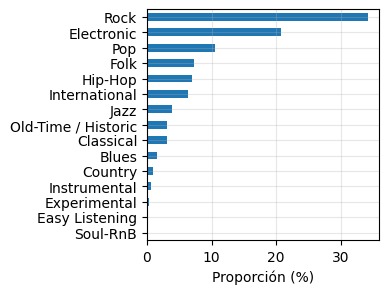

In [272]:
print(f"N. de clases: {labels.unique().__len__()}")
print(labels.value_counts(normalize=True, ascending=False))
print(labels.value_counts(normalize=False, ascending=False))
(labels.value_counts(normalize=True, sort=True, ascending=True)*100).plot(
    kind='barh', 
    figsize=(3, 3),
    xlabel="Proporción (%)",
    ylabel=""
)
plt.grid(alpha=0.3)
plt.savefig("./figures/desbalance.pdf", bbox_inches="tight")

In [273]:
# Planeo realizar PCA sobre cada conjunto de datos (features) que se dieron, junto con sus respectivas etiquetas.
# Luego, graficaré los resultados en 2D y 3D para visualizar cómo se distribuyen los datos en el espacio reducido.

os.makedirs('figures', exist_ok=True)

In [274]:
# Cargar etiquetas y crear encoder
le = LabelEncoder()


labels_flatten = labels.values.flatten()
labels_series = pd.Series(labels_flatten)

labels_encoded = le.fit_transform(labels_flatten)

# Colormap
unique_labels = np.unique(labels_flatten)
colors = sns.color_palette('tab20', n_colors=len(unique_labels))
color_map = dict(zip(unique_labels, colors))

### PCA 

In [275]:
def get_pca_data(features_file, labels_flatten, n_components=3, percent=0.5):
    # Cargar las características y etiquetas
    features = pd.read_csv(features_file).drop(columns=['track_id'])
    st_scaler = StandardScaler()
    features = st_scaler.fit_transform(features)
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(features)
    pca_data_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_data_df['label'] = labels_flatten

    # 50 % de muestreo estratificado
    strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))

    return strat_sample.drop(columns=['label']).to_numpy(), strat_sample['label'].values

In [276]:
def plot_2d(data, 
            labels_flatten, 
            title,
            figsize=(10,6),
            color_map=color_map,
            alpha=0.3):
    fig, ax = plt.subplots(figsize=figsize)

    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels_flatten, palette=color_map, alpha=alpha, ax=ax)

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig, ax

In [277]:
def plot_3d(data,
            labels_flatten: np.ndarray,
            title: str,
            color_map: dict,
            figsize=(10, 6),
            alpha=0.4):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw={'projection': '3d'})
    
    point_colors = [color_map[label] for label in labels_flatten]

    ax.scatter(data[:, 0], data[:, 1], data[:, 2], 
               c=point_colors, # Use the full color array
               alpha=alpha) # Alpha can be slightly higher now

    legend_elements = [Patch(facecolor=color_map[label], edgecolor='none', label=label, alpha=alpha)
                       for label in np.unique(labels_flatten)]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    
    return fig, ax

Processing feature set: chromacqt


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


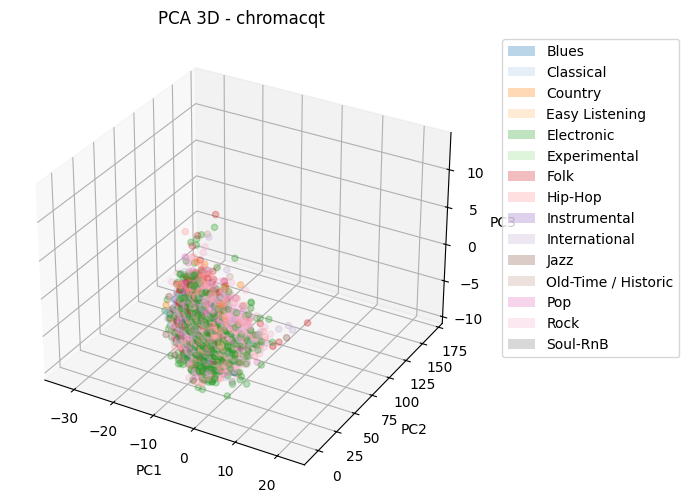

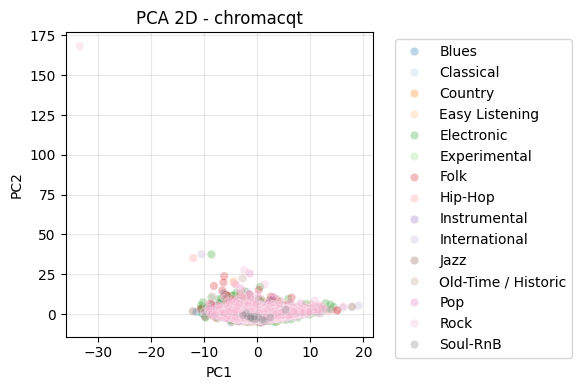

Processing feature set: zcr


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


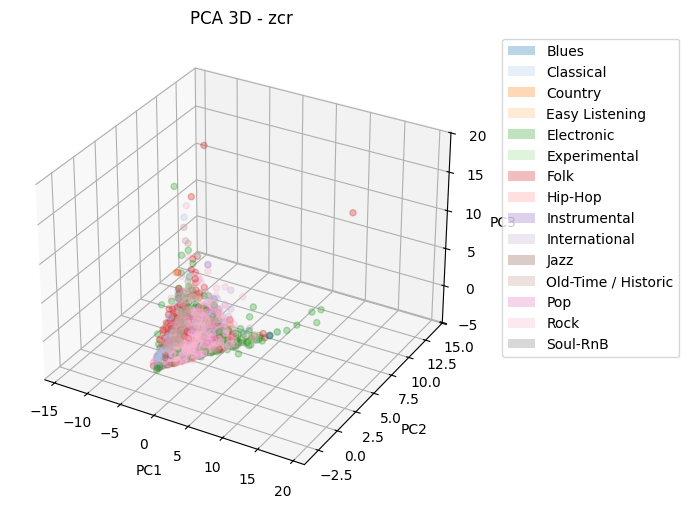

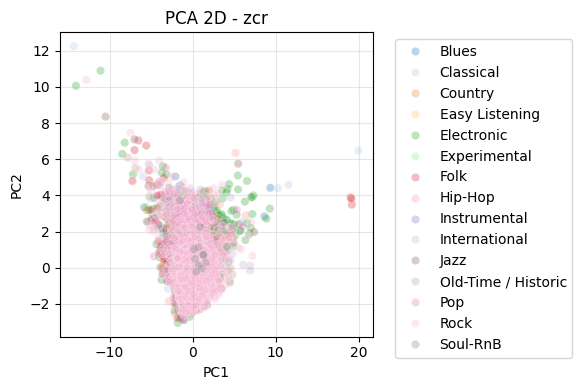

Processing feature set: social


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


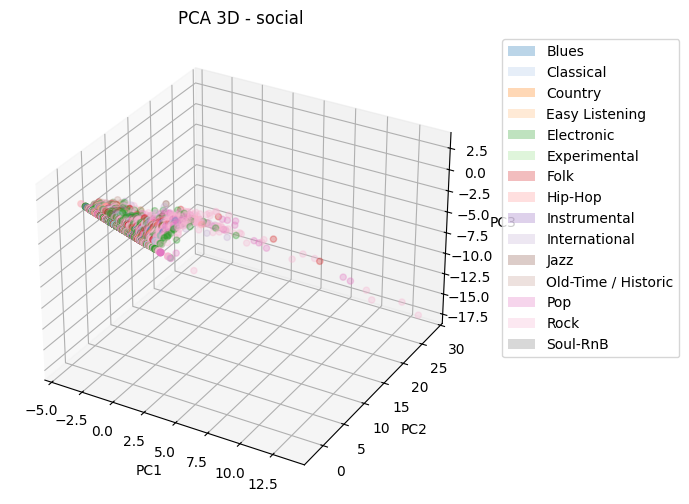

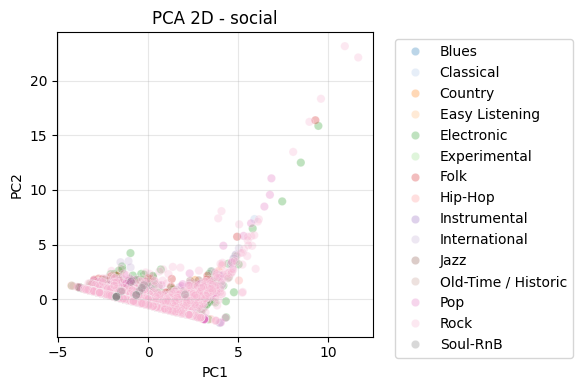

Processing feature set: audio


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


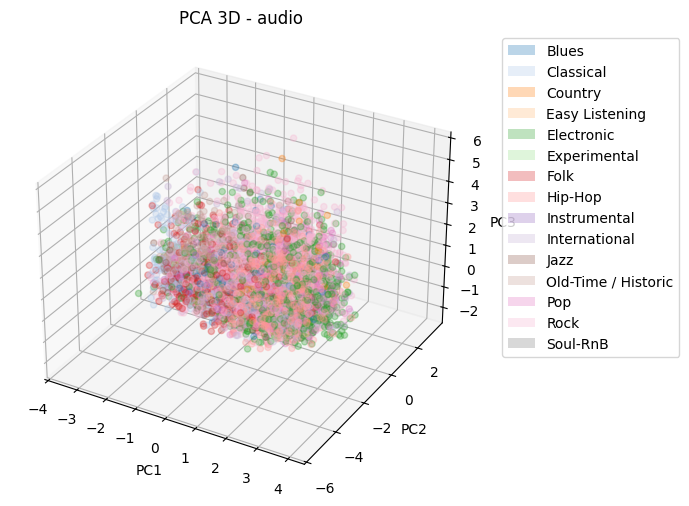

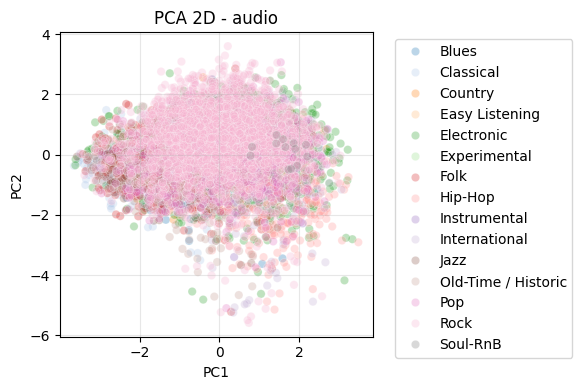

Processing feature set: chromacens


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


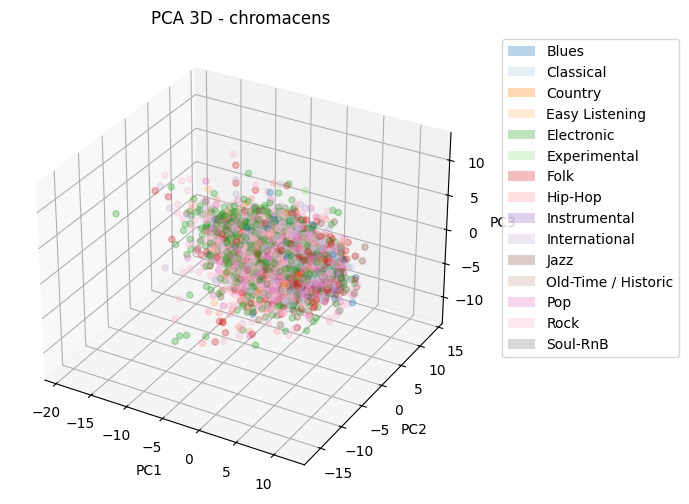

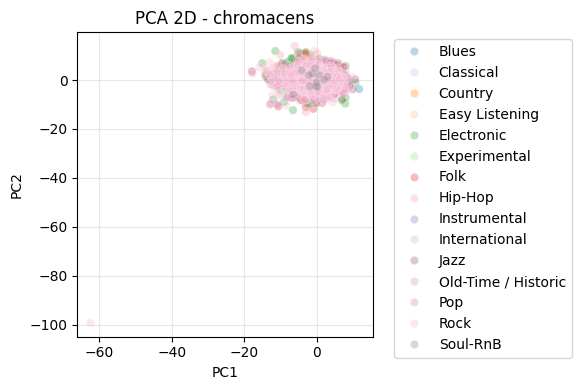

Processing feature set: chromastft


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


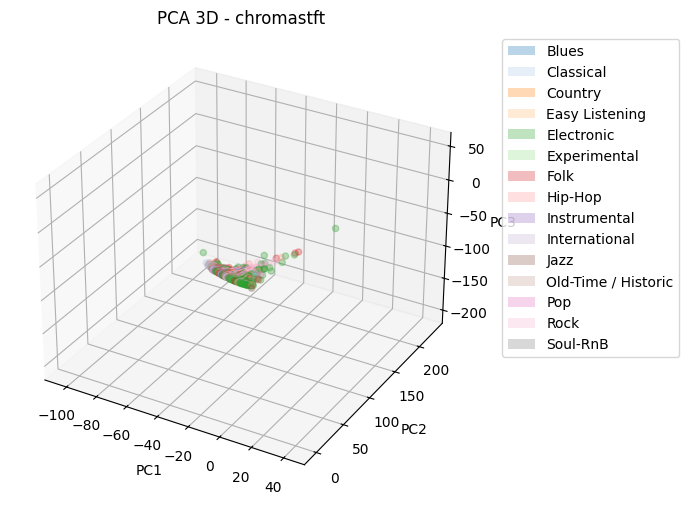

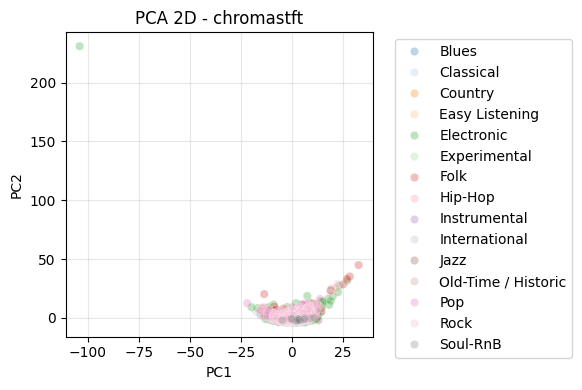

Processing feature set: tonnetz


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


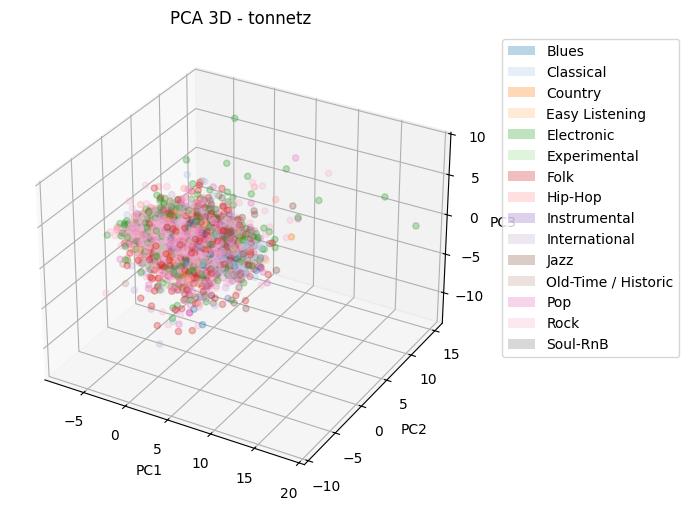

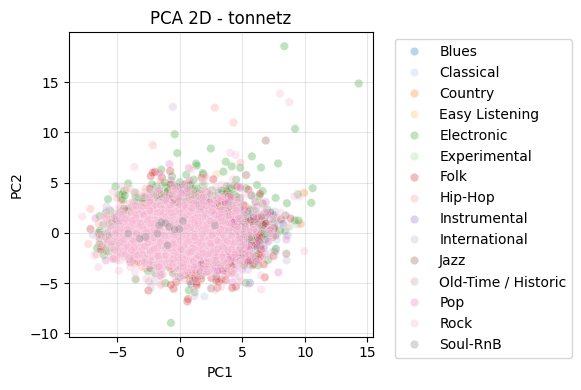

Processing feature set: mfcc


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


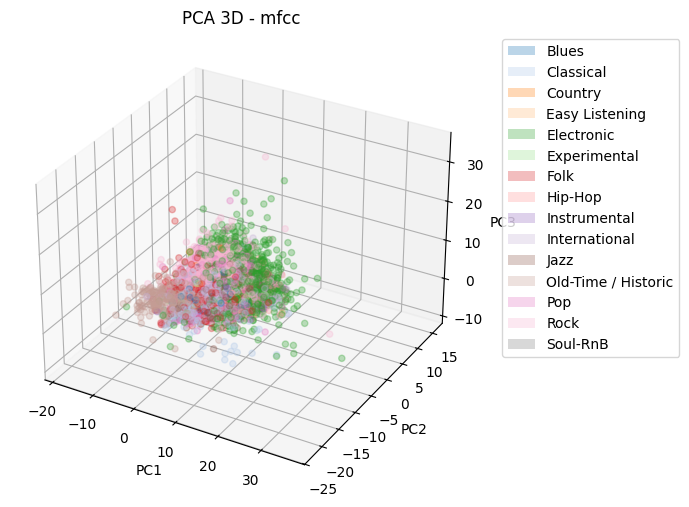

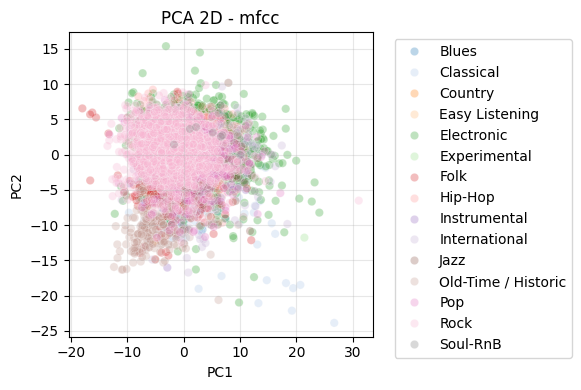

Processing feature set: spectral


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


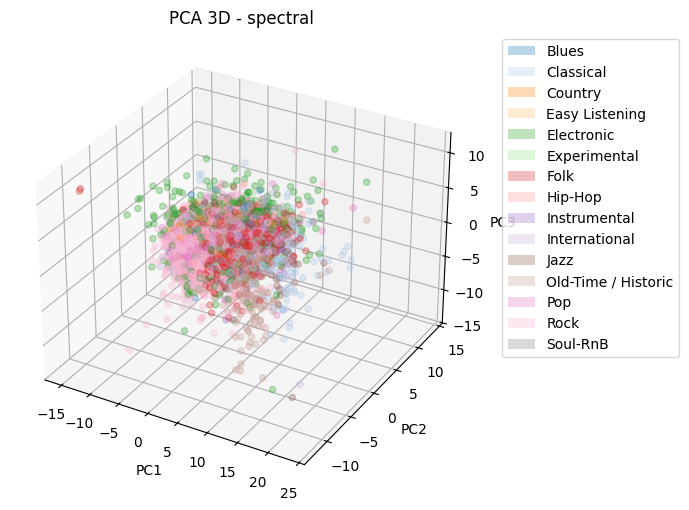

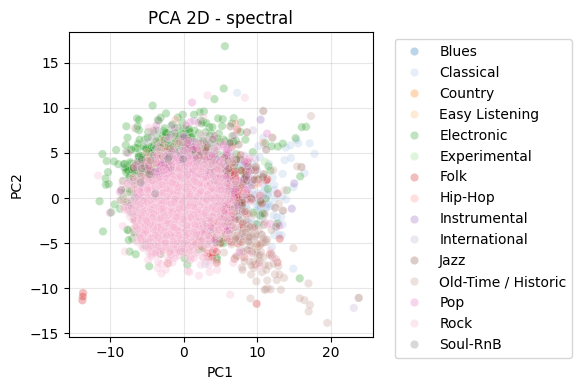

Processing feature set: rmse


/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/3913157005.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = pca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


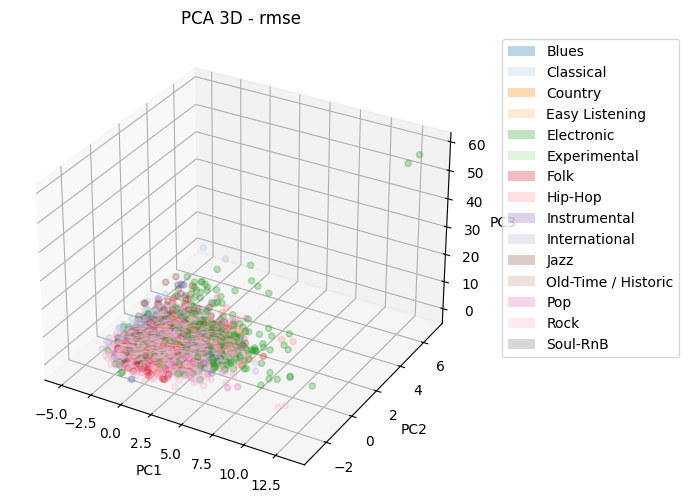

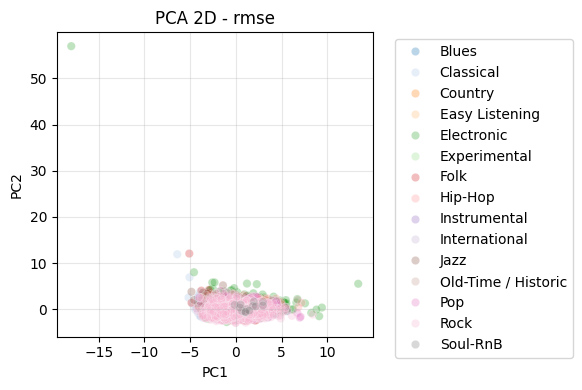

In [278]:
figsize_2d = (6, 4)
figsize_3d = (8, 6)


for feature_file in features_files:
    feature_name = os.path.basename(feature_file).replace('.csv', '').split('_')[3]
    print(f'Processing feature set: {feature_name}')

    # Obtener datos PCA
    pca_3d_data, lab_3d = get_pca_data(feature_file, labels_flatten, n_components=3)
    pca_2d_data, lab_2d = get_pca_data(feature_file, labels_flatten, n_components=2)

    # Graficar en 3D con leyenda
    fig_3d, ax_3d = plot_3d(data=pca_3d_data,
                            title=f'PCA 3D - {feature_name}', 
                            labels_flatten=lab_3d,
                            color_map=color_map,
                            figsize=figsize_3d,
                            alpha=0.3)
    plt.savefig(f'./figures/pca_3d_{feature_name}.pdf', bbox_inches='tight')
    plt.show()

    # Graficar en 2D con leyenda
    fig_2d, ax_2d = plot_2d(data=pca_2d_data,
                            title=f'PCA 2D - {feature_name}',
                            labels_flatten=lab_2d,
                            figsize=figsize_2d,
                            alpha=0.3)
    plt.savefig(f'./figures/pca_2d_{feature_name}.pdf', bbox_inches='tight')
    plt.show()

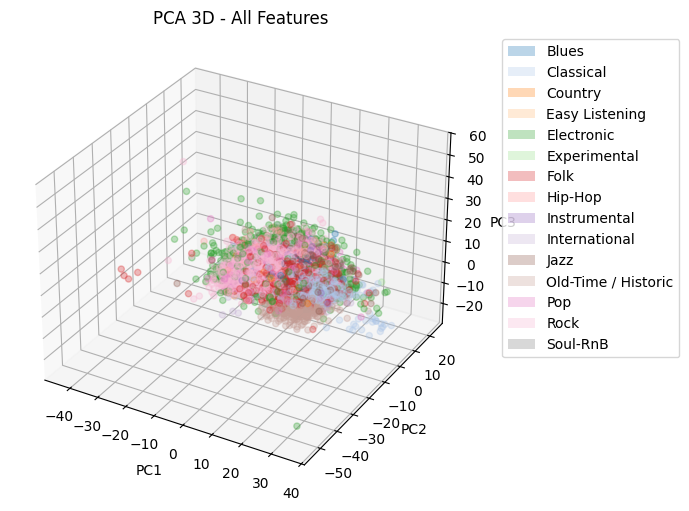

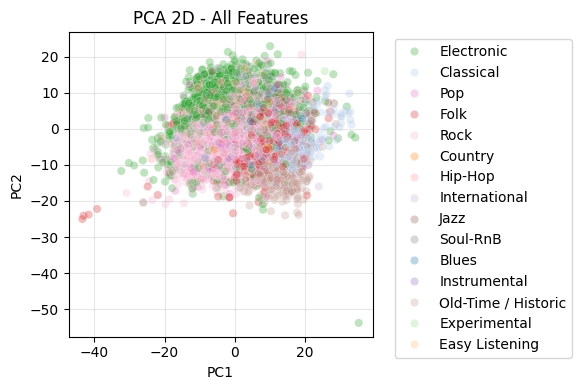

In [279]:
dataframes = [pd.read_csv(file).drop(columns=['track_id']) for file in features_files]
all_features_df = pd.concat(dataframes, axis=1)
all_features = all_features_df.to_numpy()
st_scaler = StandardScaler()
all_features = st_scaler.fit_transform(all_features)
pca = PCA(n_components=3)
all_pca_3d_data = pca.fit_transform(all_features)
all_pca_2d_data = pca.fit_transform(all_features)[:, :2]



fig_3d, ax_3d = plot_3d(data=all_pca_3d_data,
                            title=f'PCA 3D - {"All Features"}', 
                            labels_flatten=labels_flatten,
                            color_map=color_map,
                            figsize=figsize_3d,
                            alpha=0.3)
plt.savefig(f'./figures/pca_3d_{"All_Features"}.pdf', bbox_inches='tight')
plt.show()

# Graficar en 2D con leyenda
fig_2d, ax_2d = plot_2d(data=all_pca_2d_data,
                        title=f'PCA 2D - {"All Features"}',
                        labels_flatten=labels_flatten,
                        figsize=figsize_2d,
                        alpha=0.3)
plt.savefig(f'./figures/pca_2d_{"All_Features"}.pdf', bbox_inches='tight')
plt.show()

### Kernel PCA

In [280]:
def get_kpca_data(features_file, labels_flatten, n_components=3, percent=0.5):
    # Cargar las características y etiquetas
    features = pd.read_csv(features_file).drop(columns=['track_id'])
    st_scaler = StandardScaler()
    features = st_scaler.fit_transform(features)
    kpca = KernelPCA(n_components=n_components)
    kpca_data = kpca.fit_transform(features)
    kpca_data_df = pd.DataFrame(kpca_data, columns=[f'PC{i+1}' for i in range(n_components)])
    kpca_data_df['label'] = labels_flatten

    # 50 % de muestreo estratificado
    strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))

    return strat_sample.drop(columns=['label']).to_numpy(), strat_sample['label'].values

Processing feature set: chromacqt


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


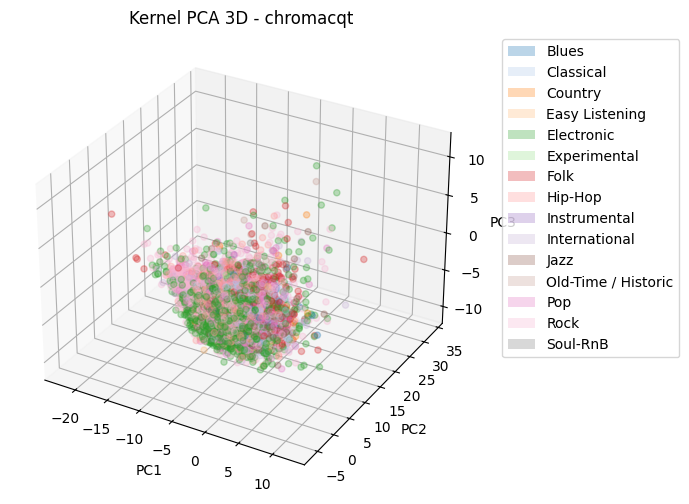

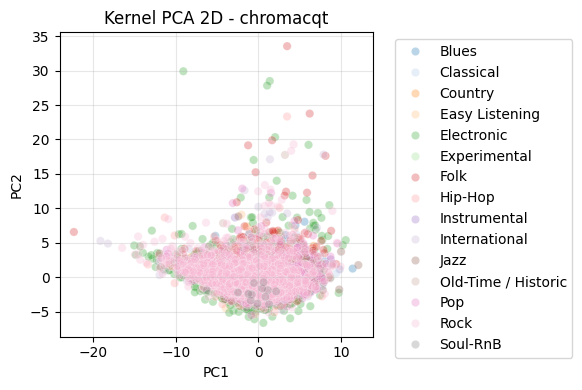

Processing feature set: zcr


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


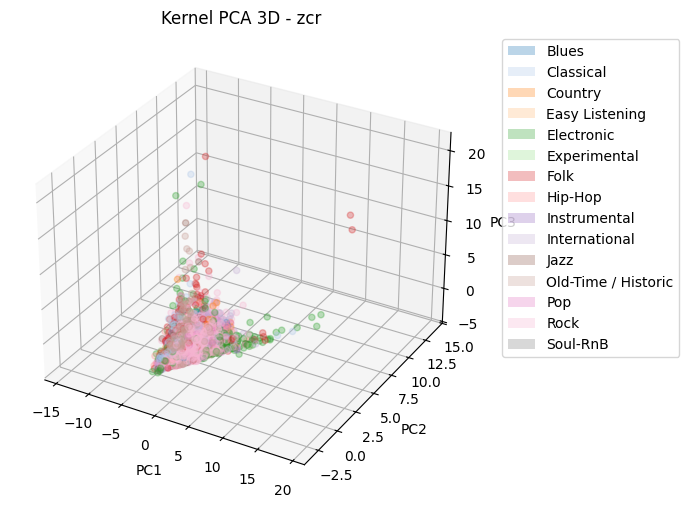

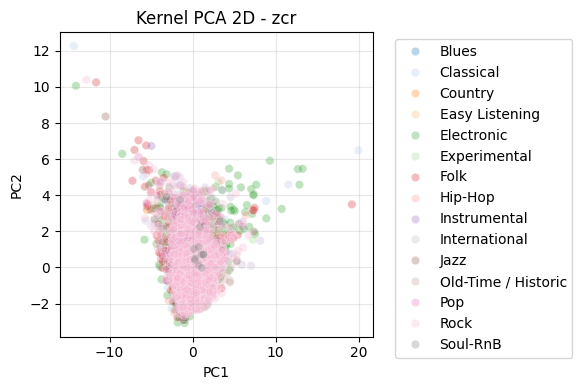

Processing feature set: social


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


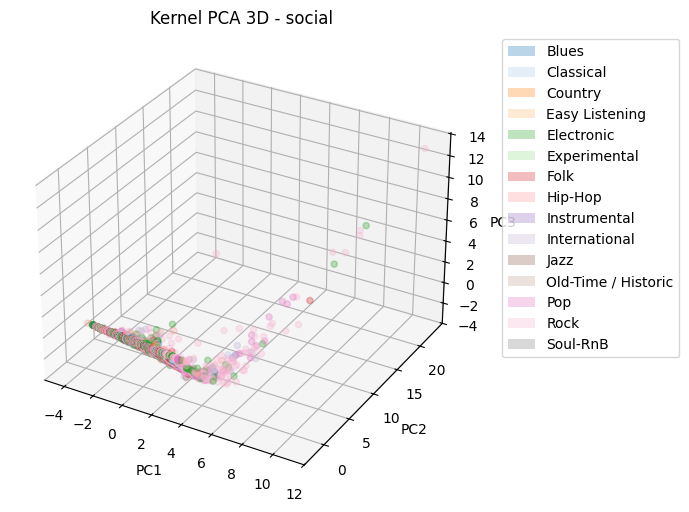

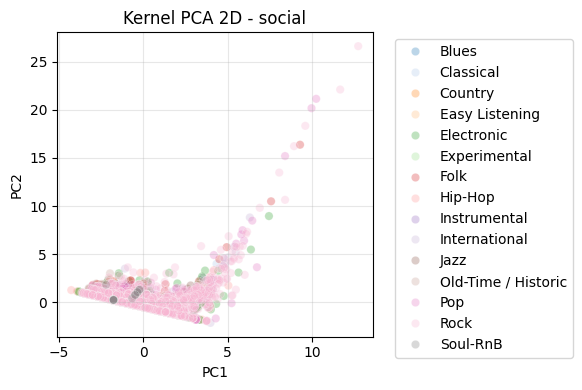

Processing feature set: audio


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


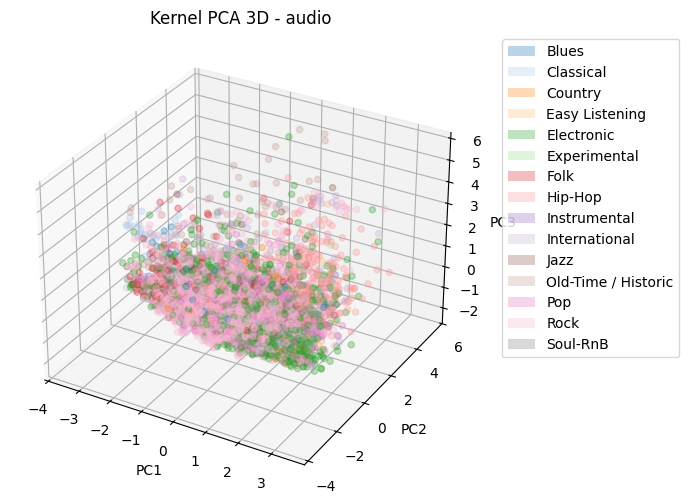

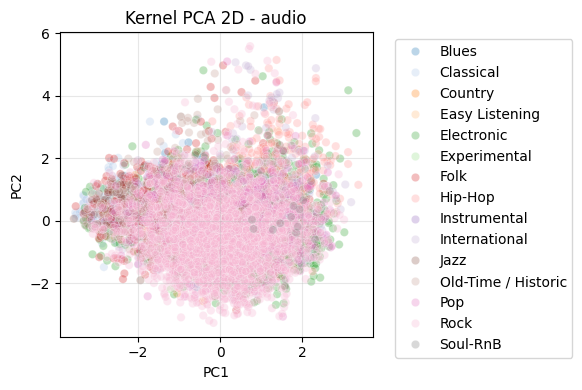

Processing feature set: chromacens


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


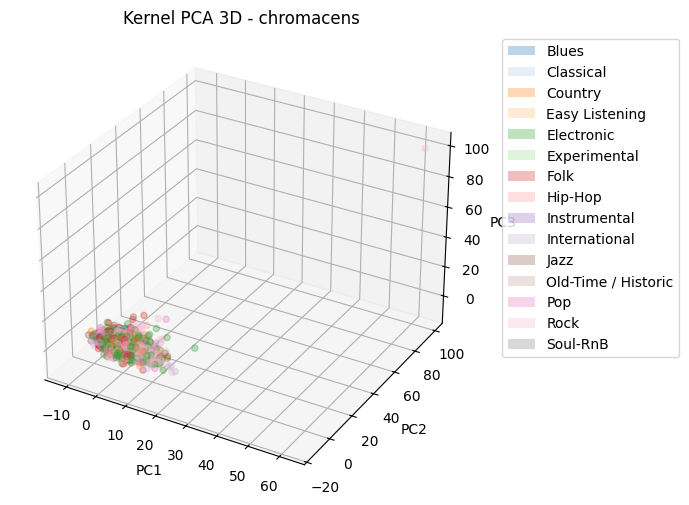

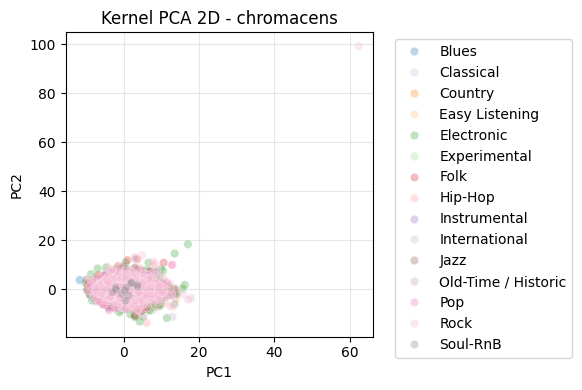

Processing feature set: chromastft


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


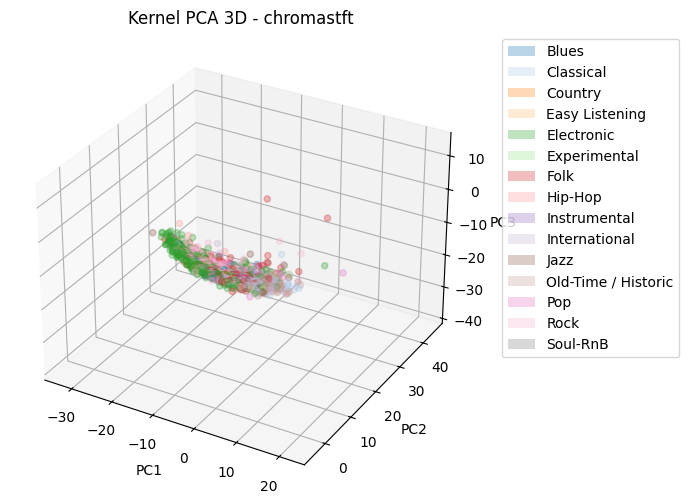

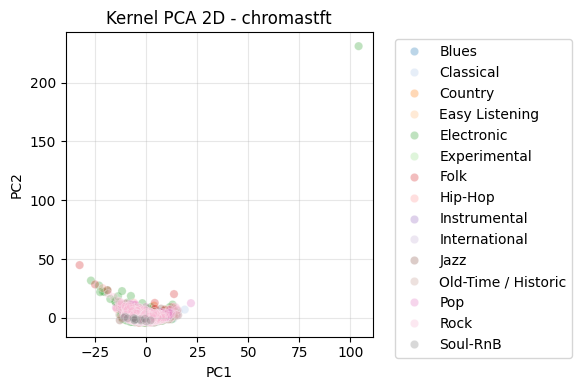

Processing feature set: tonnetz


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


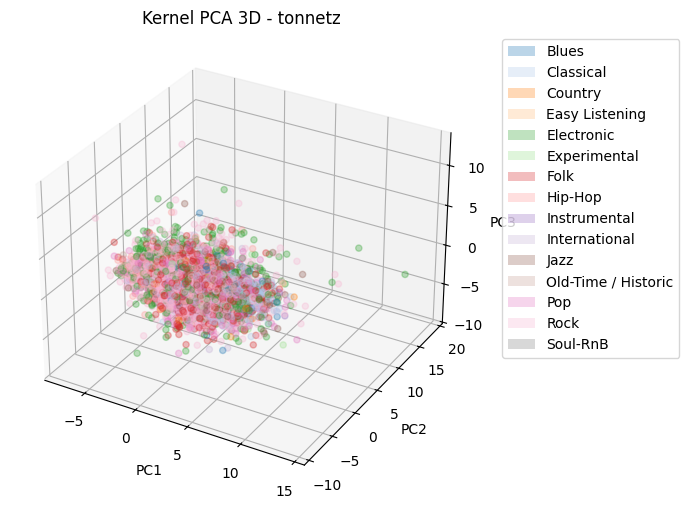

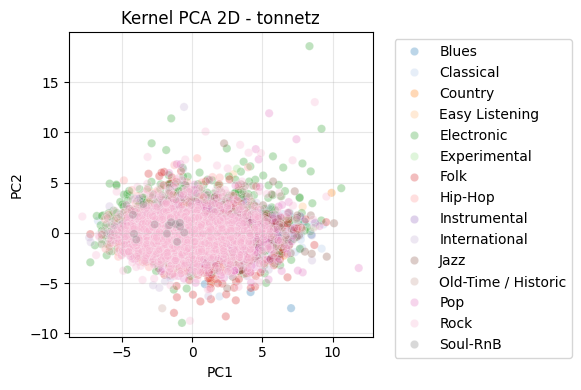

Processing feature set: mfcc


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


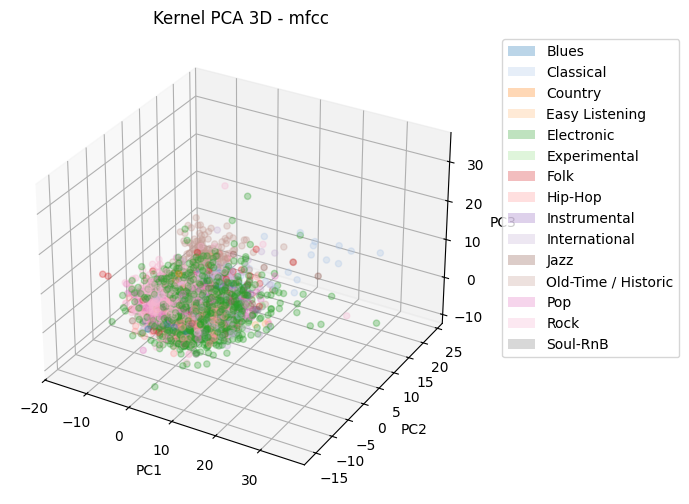

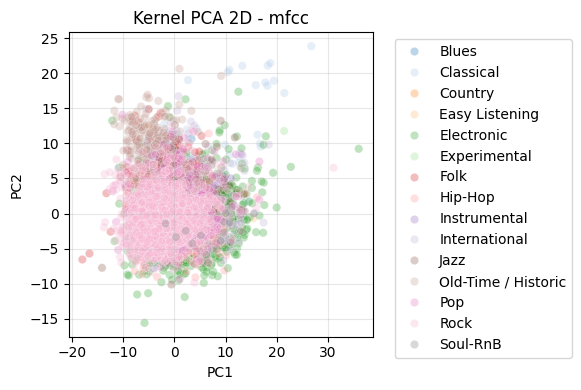

Processing feature set: spectral


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


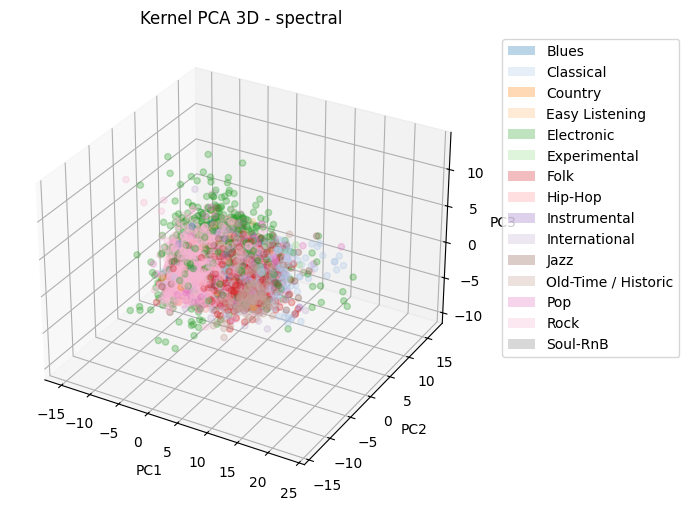

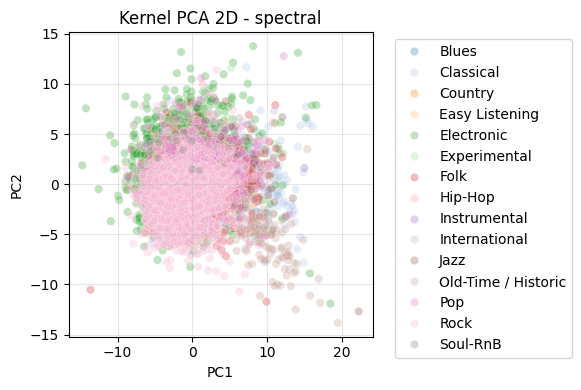

Processing feature set: rmse


/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))
/tmp/ipykernel_8427/2569589819.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = kpca_data_df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=percent))


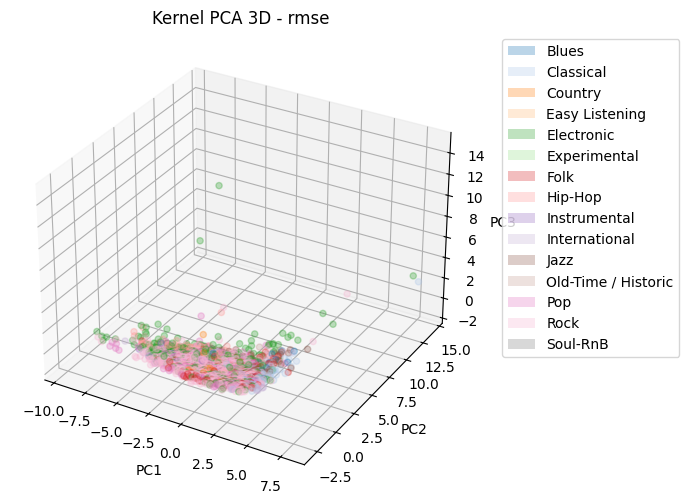

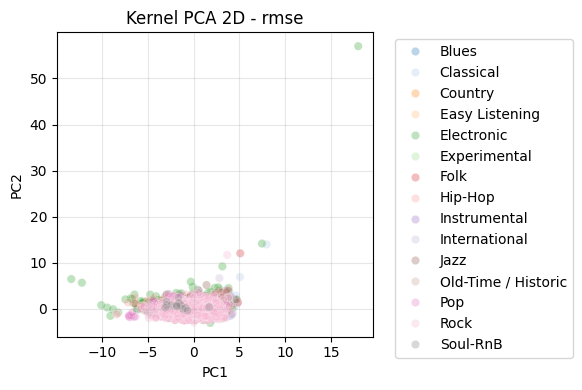

In [281]:
figsize_2d = (6, 4)
figsize_3d = (8, 6)


for feature_file in features_files:
    feature_name = os.path.basename(feature_file).replace('.csv', '').split('_')[3]
    print(f'Processing feature set: {feature_name}')

    # Obtener datos PCA
    kpca_3d_data, lab_3d = get_kpca_data(feature_file, labels_flatten, n_components=3)
    kpca_2d_data, lab_2d = get_kpca_data(feature_file, labels_flatten, n_components=2)

    # Graficar en 3D con leyenda
    fig_3d, ax_3d = plot_3d(data=kpca_3d_data,
                            title=f'Kernel PCA 3D - {feature_name}', 
                            labels_flatten=lab_3d,
                            color_map=color_map,
                            figsize=figsize_3d,
                            alpha=0.3)
    plt.savefig(f'./figures/kpca_3d_{feature_name}.pdf', bbox_inches='tight')
    plt.show()

    # Graficar en 2D con leyenda
    fig_2d, ax_2d = plot_2d(data=kpca_2d_data,
                            title=f'Kernel PCA 2D - {feature_name}',
                            labels_flatten=lab_2d,
                            figsize=figsize_2d,
                            alpha=0.3)
    plt.savefig(f'./figures/kpca_2d_{feature_name}.pdf', bbox_inches='tight')
    plt.show()

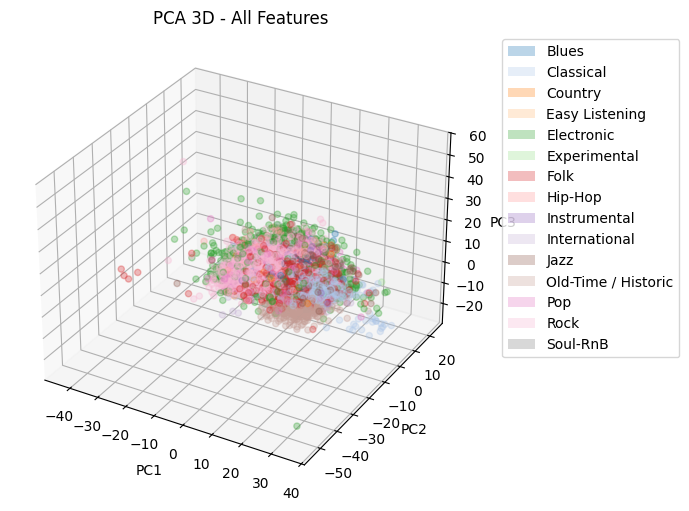

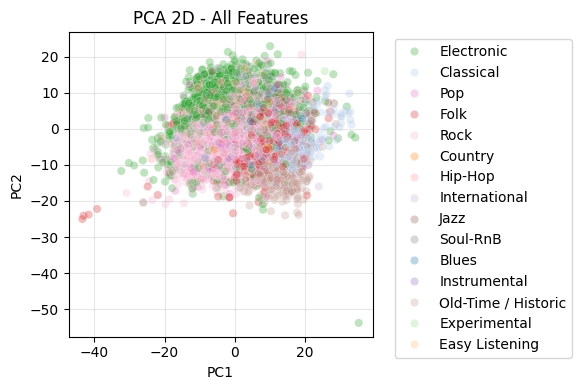

In [282]:
dataframes = [pd.read_csv(file).drop(columns=['track_id']) for file in features_files]
all_features_df = pd.concat(dataframes, axis=1)
all_features = all_features_df.to_numpy()
st_scaler = StandardScaler()
all_features = st_scaler.fit_transform(all_features)
pca = PCA(n_components=3)
all_pca_3d_data = pca.fit_transform(all_features)
all_pca_2d_data = pca.fit_transform(all_features)[:, :2]



fig_3d, ax_3d = plot_3d(data=all_pca_3d_data,
                            title=f'PCA 3D - {"All Features"}', 
                            labels_flatten=labels_flatten,
                            color_map=color_map,
                            figsize=figsize_3d,
                            alpha=0.3)
plt.savefig(f'./figures/pca_3d_{"All_Features"}.pdf', bbox_inches='tight')
plt.show()

# Graficar en 2D con leyenda
fig_2d, ax_2d = plot_2d(data=all_pca_2d_data,
                        title=f'PCA 2D - {"All Features"}',
                        labels_flatten=labels_flatten,
                        figsize=figsize_2d,
                        alpha=0.3)
plt.savefig(f'./figures/pca_2d_{"All_Features"}.pdf', bbox_inches='tight')
plt.show()

### Seleccion de variables

Lo haremos con un Random Forest. Entrenaremos hasta obtener el mejor modelo de este tipo y con este haremos la selección de variables.

### Usando Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from hyperopt import fmin, hp, Trials

/home/gus/CIMAT/Tercer Semestre/Multimodal/T1/.venv/lib/python3.12/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    all_features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

In [18]:
print(f'Train shape: {X_train.shape}, Val shape: {X_val.shape}')

Train shape: (9977, 531), Val shape: (2495, 531)


In [19]:
import mlflow
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

In [66]:
mlflow.set_tracking_uri("http://localhost:5000")

In [67]:
mlflow.set_experiment("T1-MIR-Classification")

<Experiment: artifact_location='/home/gus/CIMAT/Tercer Semestre/Multimodal/T1/mlartifacts/1', creation_time=1758522027489, experiment_id='1', last_update_time=1758522027489, lifecycle_stage='active', name='T1-MIR-Classification', tags={}>

In [47]:
def objective(params):
    with mlflow.start_run(nested=True):
        mlflow.set_tag("model_name", "RandomForest")
        mlflow.log_params(params)

        model = RandomForestClassifier(**params, random_state=42)

        score = cross_val_score(
            model, X_train, y_train, cv=5, scoring="f1_weighted"
        ).mean()

        mlflow.log_metric("f1_weighted_cv_score", score)

        return {"loss": -score, "status": STATUS_OK}

In [50]:
search_space = {
    'n_estimators': hp.choice('n_estimators', [5,10,25,50,100]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
    'bootstrap': hp.choice('bootstrap', [True, False])
}

In [53]:
with mlflow.start_run(run_name="RandomForest_Hyperopt"):
    trials = Trials()
    best_params_raw = fmin(
        fn=objective,
        space=search_space,
        algo=tpe.suggest,
        max_evals=50,
        trials=trials,
        rstate=np.random.default_rng(42)
    )
    best_params = space_eval(search_space, best_params_raw)
    best_run = sorted(trials.results, key=lambda x: x["loss"])[0]
    mlflow.log_metric("best_cv_f1_score", -best_run["loss"])
    mlflow.log_params(best_params)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

🏃 View run whimsical-horse-585 at: http://localhost:5000/#/experiments/1/runs/4f276dcc4cfb471dbc420386d6b81348

🧪 View experiment at: http://localhost:5000/#/experiments/1

🏃 View run silent-rat-509 at: http://localhost:5000/#/experiments/1/runs/d5fa29b353b242018453a4a58d27dc0b

🧪 View experiment at: http://localhost:5000/#/experiments/1                    

🏃 View run gregarious-crab-490 at: http://localhost:5000/#/experiments/1/runs/c25972b574584847ac9e50bbe1fcf747

🧪 View experiment at: http://localhost:5000/#/experiments/1                    

🏃 View run charming-turtle-174 at: http://localhost:5000/#/experiments/1/runs/2674f8bffd844678bcb2c8912888dd14

🧪 View experiment at: http://localhost:5000/#/experiments/1                    

🏃 View run respected-dog-219 at: http://localhost:5000/#/experiments/1/runs/9b76c8d92fa04882bd55c40f0682d6d1

🧪 View experiment at: http://localhost:5000/#/experiments/1                    

🏃 View run sassy-croc-151 at: http://localhost:5000/#/experime

KeyboardInterrupt: 

In [20]:
## Los mejores hiperparámetros encontrados son:
best_params = {
    "bootstrap": False,
    "max_depth": 20,
    "min_samples_split": 5,
    "min_samples_leaf": 1,
    "n_estimators": 100
}

# Entrenar el modelo final con los mejores hiperparámetros
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       random_state=42)

In [24]:
importances = final_model.feature_importances_

In [25]:
df_feature_importances = pd.DataFrame({
    'feature': all_features_df.columns,
    'importance': importances
})
df_feature_importances = df_feature_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)
sum_importances = df_feature_importances['importance'].sum()
df_feature_importances['importance_normalized'] = df_feature_importances['importance'] / sum_importances * 100
acumulated_importance = df_feature_importances['importance_normalized'].cumsum()
df_feature_importances['acumulated_importance'] = acumulated_importance

In [26]:
std = np.std([tree.feature_importances_ for tree in final_model.estimators_], axis=0)

<Axes: title={'center': 'Feature Importances from Random Forest Classifier'}, xlabel='Feature Index', ylabel='Feature Importance'>

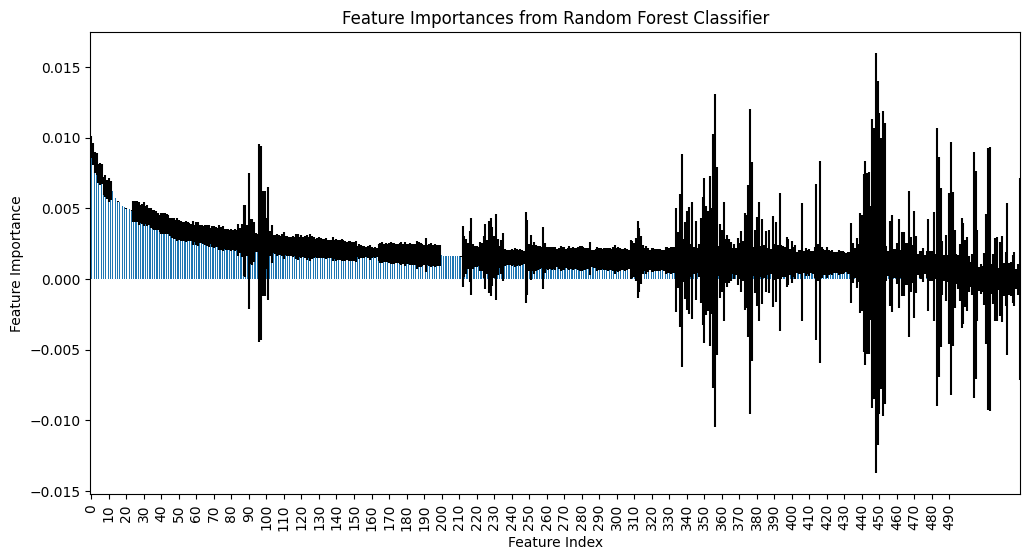

In [27]:
df_feature_importances['importance'].plot(kind='bar', 
                                          figsize=(12,6),
                                          yerr=std,
                                          xticks=[i*10 for i in range(50)],
                                          xlabel='Feature Index',
                                          ylabel='Feature Importance',
                                          title='Feature Importances from Random Forest Classifier')

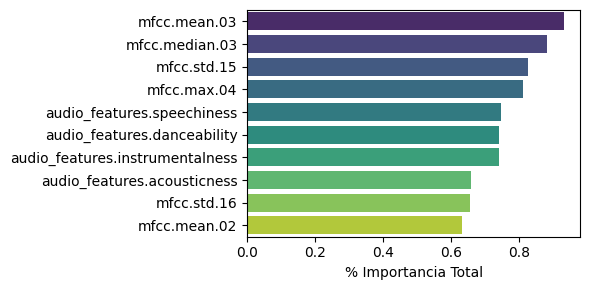

In [290]:
top_n = 10

plt.figure(figsize=(6, 3))
sns.barplot(
    x='importance_normalized',
    y='feature',
    data=df_feature_importances.head(top_n),
    palette='viridis',
    hue='feature',
    legend=False
)

plt.xlabel('% Importancia Total')
plt.ylabel("")
plt.tight_layout()
plt.savefig('./figures/feature_importances.pdf', bbox_inches='tight')
plt.show()

### Feature Permutation

De acuerdo a la [documentación de sklearn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py), las importancias de features mediante una medida de impureza pueden estar sesgadas para features con alta cardinalidad, el cual bien podría ser nuestro caso pues trabajamos con variables continuas. Se propone Permutation Feature Importance como alternativa.


In [29]:
from sklearn.inspection import permutation_importance

In [30]:
result = permutation_importance(final_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)

/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth

In [31]:
forest_importances = pd.DataFrame({
    'Feature': all_features_df.columns,
    'Importance': result.importances_mean,
    'Importance_std': result.importances_std
})
forest_importances = forest_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
std_importances = forest_importances['Importance_std'].to_numpy()

In [32]:
forest_importances.head(20)

Feature  Importance  Importance_std
0      audio_features.instrumentalness    0.008737        0.001782
1           audio_features.speechiness    0.008136        0.001980
2             spectralcontrast.mean.02    0.004409        0.001521
3                          mfcc.std.13    0.004409        0.001317
4                          mfcc.std.15    0.004208        0.002684
5                       mfcc.median.03    0.004128        0.001923
6                audio_features.energy    0.004088        0.001072
7           spectralcontrast.median.03    0.003968        0.001823
8                          mfcc.std.14    0.003848        0.001218
9   social_features.artist_familiarity    0.003768        0.001218
10    social_features.artist_discovery    0.003527        0.001351
11         audio_features.danceability    0.003206        0.001267
12                  chromastft.skew.11    0.002886        0.000641
13                        mfcc.mean.06    0.002846        0.000657
14        spectralcontrast.kurtosis.01    0.002766        0.001628
15                        mfcc.skew.01    0.002685        0.001046
16                          zcr.std.01    0.002685        0.001897
17                         mfcc.std.09    0.002605        0.001768
18                         mfcc.max.08    0.002525        0.000596
19                         mfcc.min.05    0.002525        0.001046

<Axes: title={'center': 'Feature Importances from Random Forest Classifier'}, xlabel='Feature Index', ylabel='Feature Importance'>

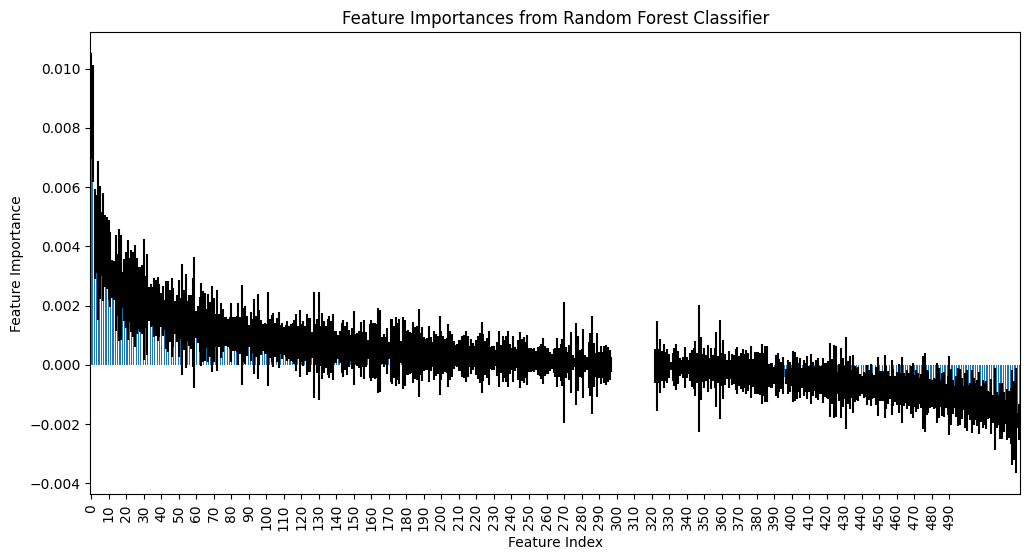

In [33]:
graph_std = True
forest_importances['Importance'].plot(kind='bar', 
                                          figsize=(12,6),
                                          xticks=[i*10 for i in range(50)],
                                          yerr = std_importances if graph_std else None,
                                          xlabel='Feature Index',
                                          ylabel='Feature Importance',
                                          title='Feature Importances from Random Forest Classifier')

Probaré con distinta cantidad de features, 45, 100, etc.

In [326]:
features_by_permutation = forest_importances['Feature'].head(200).tolist()
features_by_rf = df_feature_importances['feature'].head(200).tolist()

set_features_by_permutation = set(features_by_permutation)
set_features_by_rf = set(features_by_rf)

In [327]:
set_features_by_permutation.intersection(set_features_by_rf).__len__()

117

## Inciso b) Entrenamiento de red neuronal

In [328]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [329]:
# Definimos los dos datasets con las features seleccionadas
X_rf_train = pd.DataFrame(X_train, columns=all_features_df.columns)[features_by_rf]
X_rf_test = pd.DataFrame(X_val, columns=all_features_df.columns)[features_by_rf]

X_perm_train = pd.DataFrame(X_train, columns=all_features_df.columns)[features_by_permutation]
X_perm_test = pd.DataFrame(X_val, columns=all_features_df.columns)[features_by_permutation]

In [330]:
# Preprocesamiento

# standardización
rf_scaler = StandardScaler()
X_rf_train = rf_scaler.fit_transform(X_rf_train)
X_rf_test = rf_scaler.transform(X_rf_test)

perm_scaler = StandardScaler()
X_perm_train = perm_scaler.fit_transform(X_perm_train)
X_perm_test = perm_scaler.transform(X_perm_test)

# pytorch tensors
X_rf_train_tensor = torch.tensor(X_rf_train, dtype=torch.float32)
X_rf_test_tensor = torch.tensor(X_rf_test, dtype=torch.float32)

X_perm_train_tensor = torch.tensor(X_perm_train, dtype=torch.float32)
X_perm_test_tensor = torch.tensor(X_perm_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# tensors dataset
rf_train_dataset = TensorDataset(X_rf_train_tensor, y_train_tensor)
rf_test_dataset = TensorDataset(X_rf_test_tensor, y_val_tensor)

perm_train_dataset = TensorDataset(X_perm_train_tensor, y_train_tensor)
perm_test_dataset = TensorDataset(X_perm_test_tensor, y_val_tensor)

In [331]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
input_size = X_rf_train.shape[1]
output_size = len(np.unique(y_train))
print(f'Using device: {device}')

# hyperparámetros para shallow net
batch_size = 128
hidden_size = 256
learning_rate = 0.001
epochs = 100


Using device: cuda


In [332]:
train_dataloader_rf = DataLoader(rf_train_dataset, batch_size=batch_size)
test_dataloader_rf = DataLoader(rf_test_dataset, batch_size=batch_size)

train_dataloader_perm = DataLoader(perm_train_dataset, batch_size=batch_size)
test_dataloader_perm = DataLoader(perm_test_dataset, batch_size=batch_size)

In [333]:
class ShallowNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size // 2, hidden_size // 4),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size // 4, num_classes)
        )

    def forward(self, x):
        return self.network(x)

In [239]:
rf_model = ShallowNet(input_size=input_size, hidden_size=hidden_size, num_classes=output_size).to(device)

rf_criterion = nn.CrossEntropyLoss()
rf_optimizer = optim.Adam(rf_model.parameters(), lr=learning_rate)
rf_scheduler = ReduceLROnPlateau(rf_optimizer, 'min', patience=20, factor=0.5)

In [240]:
perm_model = ShallowNet(input_size=input_size, hidden_size=hidden_size, num_classes=output_size).to(device)

perm_criterion = nn.CrossEntropyLoss()
perm_optimizer = optim.Adam(perm_model.parameters(), lr=learning_rate)
perm_scheduler = ReduceLROnPlateau(perm_optimizer, 'min', patience=20, factor=0.5)

In [241]:
def test(model, test_dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for features, labels in test_dataloader:
            features, labels = features.to(device), labels.to(device)
            y_logits = model(features)
            _, predicted = torch.max(y_logits.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    f1 = f1_score(all_labels, all_preds, average='weighted')
    acc = np.mean(np.array(all_labels) == np.array(all_preds))
    return {'f1_score': f1, 'accuracy': acc}

def train(model,
          criterion,
          optimizer,
          train_dataloader,
          test_dataloader,
          epochs,
          model_dir,
          scheduler,
          run_name=None,
          feature_selection_method=None,
          num_features=None,
          learning_rate=None,
          batch_size=None,
          hidden_size=None
):
    """
    Enhanced training function with MLflow logging
    """
    train_losses = []
    val_losses = []
    
    with mlflow.start_run(run_name=run_name):
        # Log hyperparameters and model info
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("hidden_size", hidden_size)
        mlflow.log_param("num_features", num_features)
        mlflow.log_param("feature_selection_method", feature_selection_method)
        mlflow.log_param("optimizer", type(optimizer).__name__)
        mlflow.log_param("criterion", type(criterion).__name__)
        mlflow.log_param("scheduler", type(scheduler).__name__)
        mlflow.log_param("device", str(next(model.parameters()).device))
        
        # Log model architecture
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        mlflow.log_param("total_parameters", total_params)
        mlflow.log_param("trainable_parameters", trainable_params)
        
        # Log model architecture as text
        model_summary = str(model)
        mlflow.log_text(model_summary, "model_architecture.txt")
        
        for epoch in range(epochs):
            best_val_loss = min(val_losses) if val_losses else float('inf')
            
            model.train()  # Set the model to training mode
            running_loss = 0.0
            for i, (features, labels) in enumerate(train_dataloader):
                
                features, labels = features.to(device), labels.to(device)

                model.train()

                # Forward pass
                y_logits = model(features)
                loss = criterion(y_logits, labels)

                # Backward and optimize
                optimizer.zero_grad()  # Clear previous gradients
                loss.backward()        # Compute gradients
                optimizer.step()         # Update weights

                running_loss += loss.item()

            epoch_loss = running_loss / len(train_dataloader)
            train_losses.append(epoch_loss)
            
            # Val losses
            model.eval()
            
            val_running_loss = 0.0
            with torch.no_grad():
                for features, labels in test_dataloader:

                    features, labels = features.to(device), labels.to(device)

                    y_logits = model(features)
                    loss = criterion(y_logits, labels)
                    val_running_loss += loss.item()
            val_epoch_loss = val_running_loss / len(test_dataloader)
            
            scheduler.step(val_epoch_loss)
            
            val_losses.append(val_epoch_loss)
            
            # Log losses to MLflow every epoch
            mlflow.log_metric("train_loss", epoch_loss, step=epoch+1)
            mlflow.log_metric("val_loss", val_epoch_loss, step=epoch+1)
            
            # Log learning rate
            current_lr = optimizer.param_groups[0]['lr']
            mlflow.log_metric("learning_rate", current_lr, step=epoch+1)
            
            if (epoch + 1) % 50 == 0 or epoch == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}, LR: {current_lr:.6f}')    
            
            # Save the model checkpoint
            if val_epoch_loss <= best_val_loss:
                os.makedirs(model_dir, exist_ok=True)
                model_path = os.path.join(model_dir, f'model_epoch_{epoch+1}.pth')
                torch.save(model.state_dict(), model_path)
                
                # Log best model to MLflow
                mlflow.log_metric("best_val_loss", val_epoch_loss)
                mlflow.log_metric("best_epoch", epoch+1)
                
                # Log f1_score and acc
                model_metrics = test(model, test_dataloader)
                mlflow.log_metric('val_f1_score', model_metrics['f1_score'], step=epoch+1)
                mlflow.log_metric('val_acc', model_metrics["accuracy"], step=epoch+1)
        
        # Log final metrics
        mlflow.log_metric("final_train_loss", train_losses[-1])
        mlflow.log_metric("final_val_loss", val_losses[-1])
        mlflow.log_metric("min_val_loss", min(val_losses))
        mlflow.log_metric("min_val_loss_epoch", np.argmin(val_losses) + 1)
        
        # Log the best model as an artifact
        best_epoch = np.argmin(val_losses) + 1
        best_model_path = os.path.join(model_dir, f'model_epoch_{best_epoch}.pth')
        if os.path.exists(best_model_path):
            mlflow.log_artifact(best_model_path, "models")

        mejor_epoca = np.argmin(val_losses) + 1
        print(f'Val Loss minima en la epoca: {mejor_epoca}')
        print(f'Val Loss minima {val_losses[mejor_epoca - 1]}')

    return train_losses, val_losses




### Entrenando para caracteristicas por RF

In [242]:
rf_train_losses, rf_test_losses = train(
                                        model=rf_model,
                                        criterion=rf_criterion,
                                        optimizer=rf_optimizer,
                                        train_dataloader=train_dataloader_rf,
                                        test_dataloader=test_dataloader_rf,
                                        epochs=epochs,
                                        model_dir='./model/rf/',
                                        scheduler=rf_scheduler,
                                        run_name="Neural_Network_RF_Features",
                                        feature_selection_method="Random Forest",
                                        num_features=X_rf_train.shape[1],
                                        learning_rate=learning_rate,
                                        batch_size=batch_size,
                                        hidden_size=hidden_size
                                    )

Epoch [1/100], Train Loss: 1.9459, Val Loss: 1.5232, LR: 0.001000
Epoch [50/100], Train Loss: 0.8828, Val Loss: 1.1149, LR: 0.001000
Epoch [100/100], Train Loss: 0.6515, Val Loss: 1.1921, LR: 0.000250
Val Loss minima en la epoca: 41
Val Loss minima 1.1022429674863816
🏃 View run Neural_Network_RF_Features at: http://localhost:5000/#/experiments/1/runs/e3bc5addeaec4ec3bc113691dd98aba3
🧪 View experiment at: http://localhost:5000/#/experiments/1


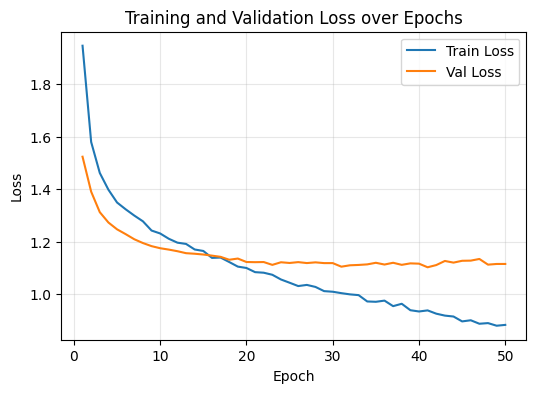

In [301]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(1, 51), rf_train_losses[:50], label='Train Loss')
ax.plot(range(1, 51), rf_test_losses[:50], label='Val Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss over Epochs')
ax.legend()
plt.grid(alpha=0.3)
plt.savefig('./figures/rf_training_validation_loss.pdf', bbox_inches='tight')
plt.show()


### Entrenamiento caracteristicas por Permutation

In [245]:
perm_train_losses, perm_test_losses = train(
                                        model=perm_model,
                                        criterion=perm_criterion,
                                        optimizer=perm_optimizer,
                                        train_dataloader=train_dataloader_perm,
                                        test_dataloader=test_dataloader_perm,
                                        epochs=epochs,
                                        model_dir='./model/perm/',
                                        scheduler=perm_scheduler,
                                        run_name="Neural_Network_Permutation_Features",
                                        feature_selection_method="Permutation Importance",
                                        num_features=X_perm_train.shape[1],
                                        learning_rate=learning_rate,
                                        batch_size=batch_size,
                                        hidden_size=hidden_size
                                    )

Epoch [1/100], Train Loss: 1.9939, Val Loss: 1.5446, LR: 0.001000
Epoch [50/100], Train Loss: 0.8683, Val Loss: 1.1830, LR: 0.001000
Epoch [100/100], Train Loss: 0.6269, Val Loss: 1.2751, LR: 0.000125
Val Loss minima en la epoca: 30
Val Loss minima 1.1479727923870087
🏃 View run Neural_Network_Permutation_Features at: http://localhost:5000/#/experiments/1/runs/c903c08e53d44f669ed0058c8c2c025f
🧪 View experiment at: http://localhost:5000/#/experiments/1


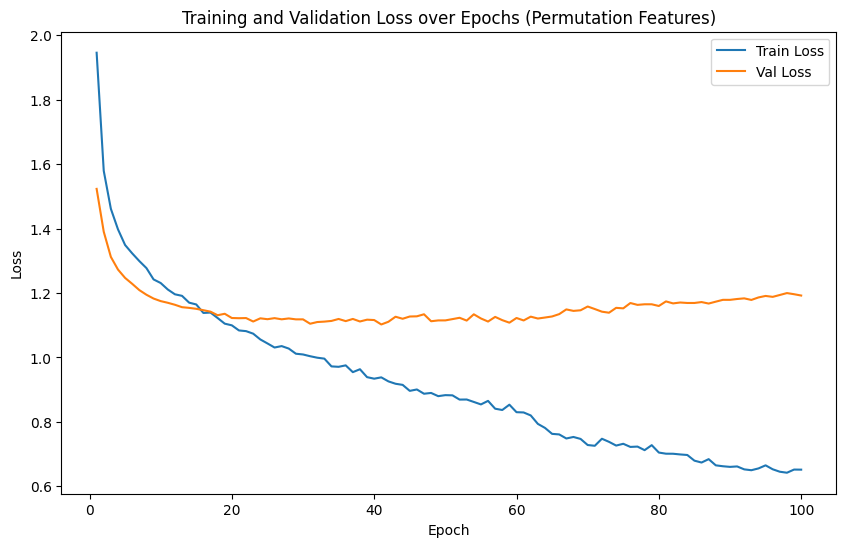

In [324]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, epochs + 1), rf_train_losses, label='Train Loss')
ax.plot(range(1, epochs + 1), rf_test_losses, label='Val Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss over Epochs (Permutation Features)')
ax.legend()
plt.show()

## Inciso c)
Predecir el genero de los datos de `test`.

In [303]:
test_features_files = [file.replace('train','test') for file in features_files]
test_all_dfs = [pd.read_csv(file).drop(columns=['track_id']) for file in test_features_files]
test_df = pd.concat(test_all_dfs, axis=1)

In [322]:
# select model with variable `model`

def predict_test(model, test_df, selected_features, le: LabelEncoder, scaler: StandardScaler):
    model.eval()
    X_test = test_df[selected_features]
    X_test = scaler.transform(X_test)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    
    test_dataset = TensorDataset(X_test_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=128)
    
    all_preds = []
    with torch.no_grad():
        for features in test_dataloader:
            features = features[0].to(device)
            y_logits = model(features)
            _, predicted = torch.max(y_logits.data, 1)
            all_preds.extend(predicted.cpu().numpy())
    
    all_preds_labels = le.inverse_transform(all_preds)
    return all_preds_labels

In [323]:
# load model /home/gus/CIMAT/Tercer Semestre/Multimodal/T1/mlartifacts/1/273c8300db0f409cb6ce0285167c5078/artifacts/models/model_epoch_54.pth

model_path = '/home/gus/CIMAT/Tercer Semestre/Multimodal/T1/mlartifacts/1/273c8300db0f409cb6ce0285167c5078/artifacts/models/model_epoch_54.pth'
model = ShallowNet(input_size=X_rf_train.shape[1], hidden_size=hidden_size, num_classes=output_size).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))

RuntimeError: Error(s) in loading state_dict for ShallowNet:
	Missing key(s) in state_dict: "network.6.weight", "network.6.bias", "network.9.weight", "network.9.bias". 
	Unexpected key(s) in state_dict: "network.5.weight", "network.5.bias", "network.8.weight", "network.8.bias". 

In [334]:
all_preds_labels = predict_test(rf_model, test_df, features_by_rf, le, rf_scaler)

In [335]:
track_ids = pd.read_csv(test_features_files[0])['track_id']
submission_df = pd.DataFrame({
    'track_id': track_ids,
    'track.genre1': all_preds_labels
})
submission_df.to_csv('./data/submission.csv', index=False)